In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

In [3]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmes
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

In [4]:
birth_rate_df[birth_rate_df['Age'] == '15-19'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
998,8,Nou Barris,50,les Roquetes,22.8,15-19
995,8,Nou Barris,47,Can Peguera,21.2,15-19
1001,8,Nou Barris,53,la Trinitat Nova,16.4,15-19
994,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
1002,8,Nou Barris,54,Torre Baró,14.0,15-19
1003,8,Nou Barris,55,Ciutat Meridiana,14.0,15-19
1005,9,Sant Andreu,57,la Trinitat Vella,13.8,15-19
1007,9,Sant Andreu,59,el Bon Pastor,12.5,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19


In [5]:
birth_rate_df[(birth_rate_df['Nom_Districte'] == 'Sants-Montjuïc') & (birth_rate_df['Age'] == '15-19')]
birth_rate_df.Nom_Districte

949     Ciutat Vella
950     Ciutat Vella
951     Ciutat Vella
952     Ciutat Vella
953         Eixample
            ...     
1017      Sant Martí
1018      Sant Martí
1019      Sant Martí
1020      Sant Martí
1021      Sant Martí
Name: Nom_Districte, Length: 219, dtype: object

In [7]:
data_dir = '../'

barna_barri = gpd.read_file(data_dir + "0301040100_Barris_UNITATS_ADM.shp") 

Ciutat_Vella = barna_barri[barna_barri["DISTRICTE"].isin(['01'])]

Eixample = barna_barri[barna_barri["DISTRICTE"].isin(['02'])]

Sants_Montjuic = barna_barri[barna_barri["DISTRICTE"].isin(['03'])]

Les_Corts = barna_barri[barna_barri["DISTRICTE"].isin(['04'])]

Sarria_Saint_Gervasi = barna_barri[barna_barri["DISTRICTE"].isin(['05'])]

Gracia = barna_barri[barna_barri["DISTRICTE"].isin(['06'])]

Horta_Guirnardo = barna_barri[barna_barri["DISTRICTE"].isin(['07'])]

Nou_Barris = barna_barri[barna_barri["DISTRICTE"].isin(['08'])]

Saint_Andreu = barna_barri[barna_barri["DISTRICTE"].isin(['09'])]

Sant_Marti = barna_barri[barna_barri["DISTRICTE"].isin(['10'])]


In [29]:
Nou_Barris.BARRI

28    44
29    45
30    46
57    47
58    48
59    51
60    52
61    49
62    50
63    53
64    54
65    55
66    56
Name: BARRI, dtype: object

In [24]:
birth_Nou_Barris_15_19 = birth_15_19[birth_15_19["Nom_Districte"] == "Nou Barris"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Nou_Barris_filtered = birth_Nou_Barris_15_19[desired_columns]


In [25]:
birth_Nou_Barris_filtered

,Nom_Districte,Codi_Barri,Nom_Barri,Nombre
992,Nou Barris,44,Vilapicina i la Torre Llobeta,2.2
993,Nou Barris,45,Porta,6.3
994,Nou Barris,46,el Turó de la Peira,14.4
995,Nou Barris,47,Can Peguera,21.2
996,Nou Barris,48,la Guineueta,3.9
997,Nou Barris,49,Canyelles,4.5
998,Nou Barris,50,les Roquetes,22.8
999,Nou Barris,51,Verdun,11.4
1000,Nou Barris,52,la Prosperitat,4.1
1001,Nou Barris,53,la Trinitat Nova,16.4


In [32]:
# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Nou_Barris_15_19['Codi_Barri'] = birth_Nou_Barris_15_19['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df = pd.merge(Nou_Barris, birth_Nou_Barris_15_19, left_on='BARRI', right_on='Codi_Barri', how='inner')

# Mostrar el DataFrame fusionado (opcional)
merged_df


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430284.731 4586877.327, 430304.839 4...",2016-2020,8,Nou Barris,44,Vilapicina i la Torre Llobeta,2.2,15-19
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431950.338 4587890.412, 431889.639 4...",2016-2020,8,Nou Barris,45,Porta,6.3,15-19
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430852.008 4587359.977, 430860.101 4...",2016-2020,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430285.722 4587532.606, 430288.180 4...",2016-2020,8,Nou Barris,47,Can Peguera,21.2,15-19
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((429956.603 4587936.737, 430028.739 4...",2016-2020,8,Nou Barris,48,la Guineueta,3.9,15-19
5,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431110.359 4587853.579, 431088.086 4...",2016-2020,8,Nou Barris,51,Verdun,11.4,15-19
6,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431187.556 4587773.169, 431069.037 4...",2016-2020,8,Nou Barris,52,la Prosperitat,4.1,15-19
7,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((429855.071 4589090.533, 429868.267 4...",2016-2020,8,Nou Barris,49,Canyelles,4.5,15-19
8,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431773.444 4589345.000, 431770.923 4...",2016-2020,8,Nou Barris,50,les Roquetes,22.8,15-19
9,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432241.072 4589590.897, 432245.660 4...",2016-2020,8,Nou Barris,53,la Trinitat Nova,16.4,15-19


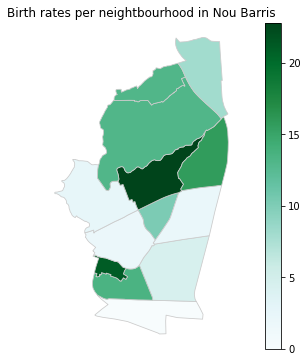

In [52]:
# set the range for the choropleth
vmin, vmax = 0, 22.8
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

merged_df.plot(column = 'Nombre', cmap = 'BuGn',ax = ax, linewidth = 0.8, edgecolor = '0.8')
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Nou Barris')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.
fig.savefig('Nou_Barris.png', dpi=300)
